In [1]:
from MCEq.core import MCEqRun
import crflux.models as pm

import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

In [2]:
models = [ 
    "DPMJETIII191",
    "DPMJETIII306",
    "EPOSLHC",
    "QGSJET01C",
    "QGSJETII03",
    "QGSJETII04",
    "SIBYLL21",
    "SIBYLL23",
    "SIBYLL23C",
    "SIBYLL23C03",
    "SIBYLL23CPP",
]

In [3]:
mag=3
muon_fluxes = {}
for m in models:
    run = MCEqRun(m, (pm.HillasGaisser2012, 'H3a'), 0)
    run.solve()
    muon_flux = (run.get_solution('conv_mu+', mag) + 
             run.get_solution('conv_mu-', mag))
    muon_fluxes[m] = muon_flux

MCEqRun::set_interaction_model(): DPMJETIII191
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): DPMJETIII306
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MatrixBuilder::_fill_matrices(): No interactions by Lambdabar0 ((-3122, np.int64(0))).
MatrixBuilder::_fill_matrices(): No interactions by Lambda0 ((3122, np.int64(0))).
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): EPOSLHC
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3

In [4]:
flux_unit = 1/(u.cm**2 * u.s * u.sr * u.GeV)
flux_unit

<Quantity 1. 1 / (GeV s sr cm2)>

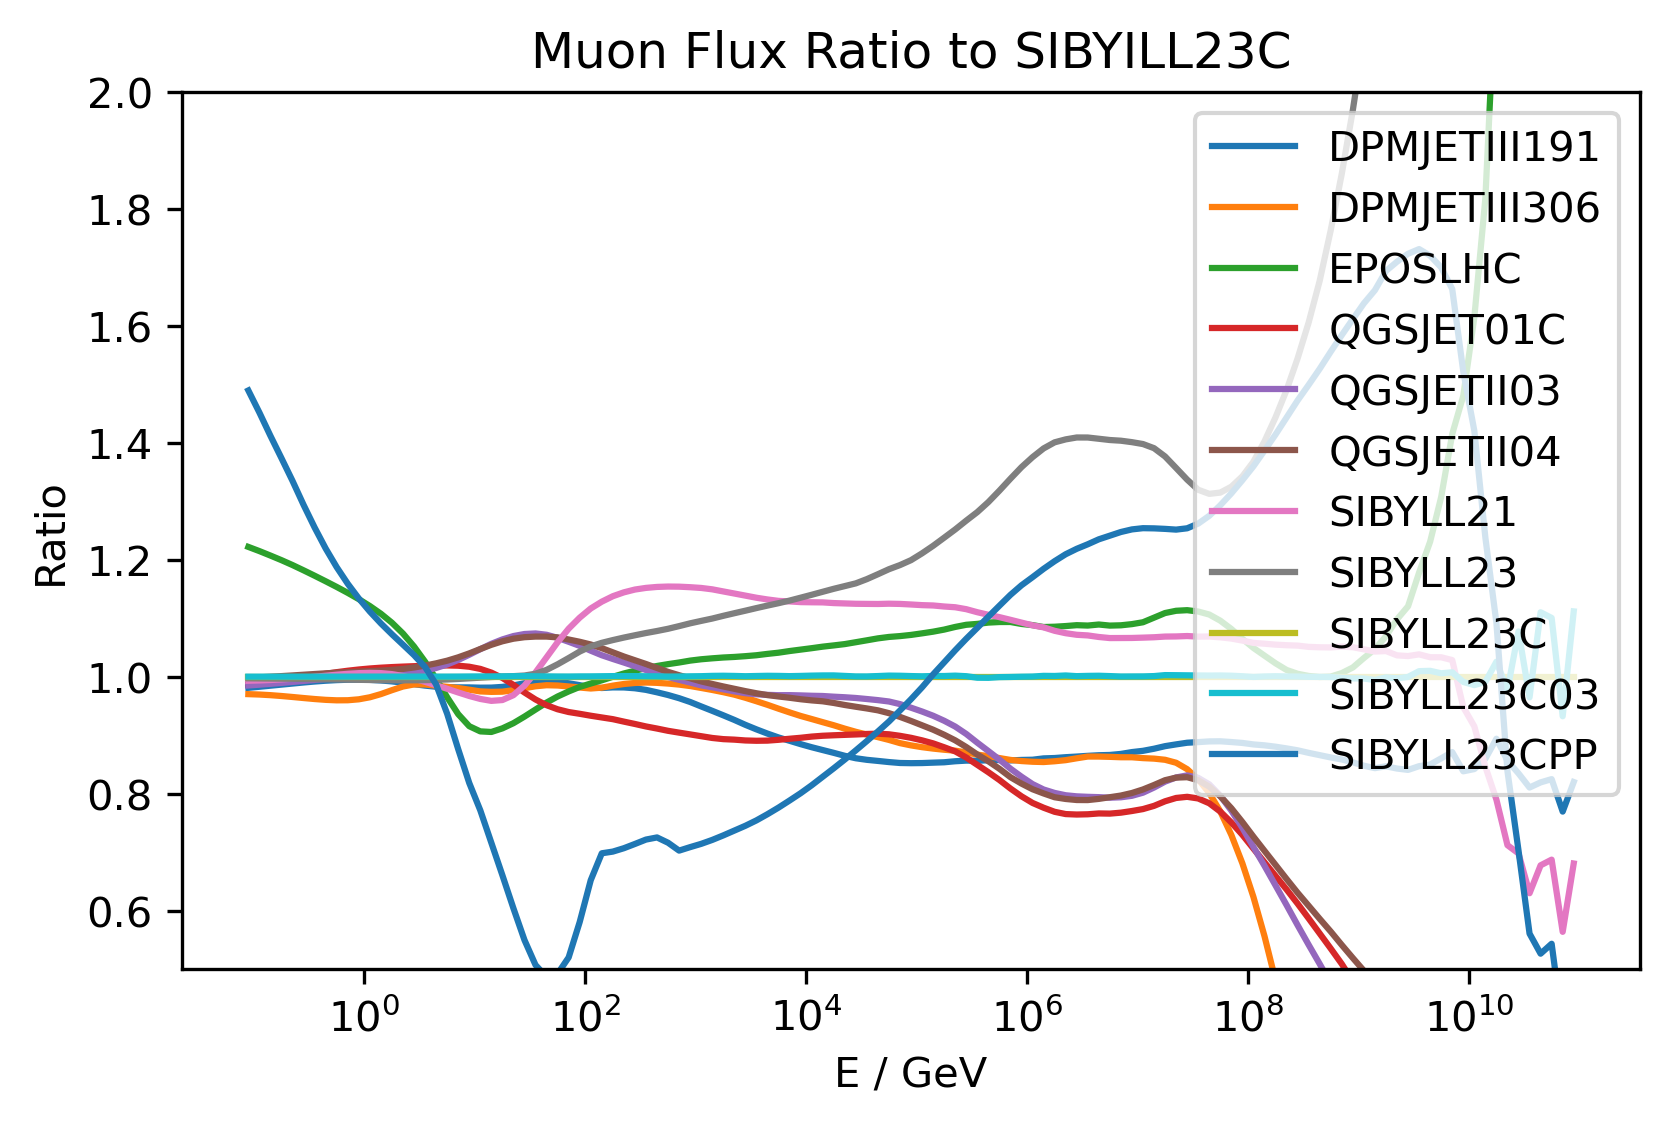

In [5]:
fig = plt.figure(figsize=(5.45, 3.64),
    dpi=300,
    constrained_layout=True)
for m in models:
    plt.plot(run.e_grid, muon_fluxes[m]/muon_fluxes["SIBYLL23C"], label=m)
plt.xscale('log')
plt.yscale('linear')
plt.ylabel('Ratio')
plt.xlabel('E / GeV')
plt.title("Muon Flux Ratio to SIBYILL23C")
plt.ylim(0.5,2)
plt.legend()

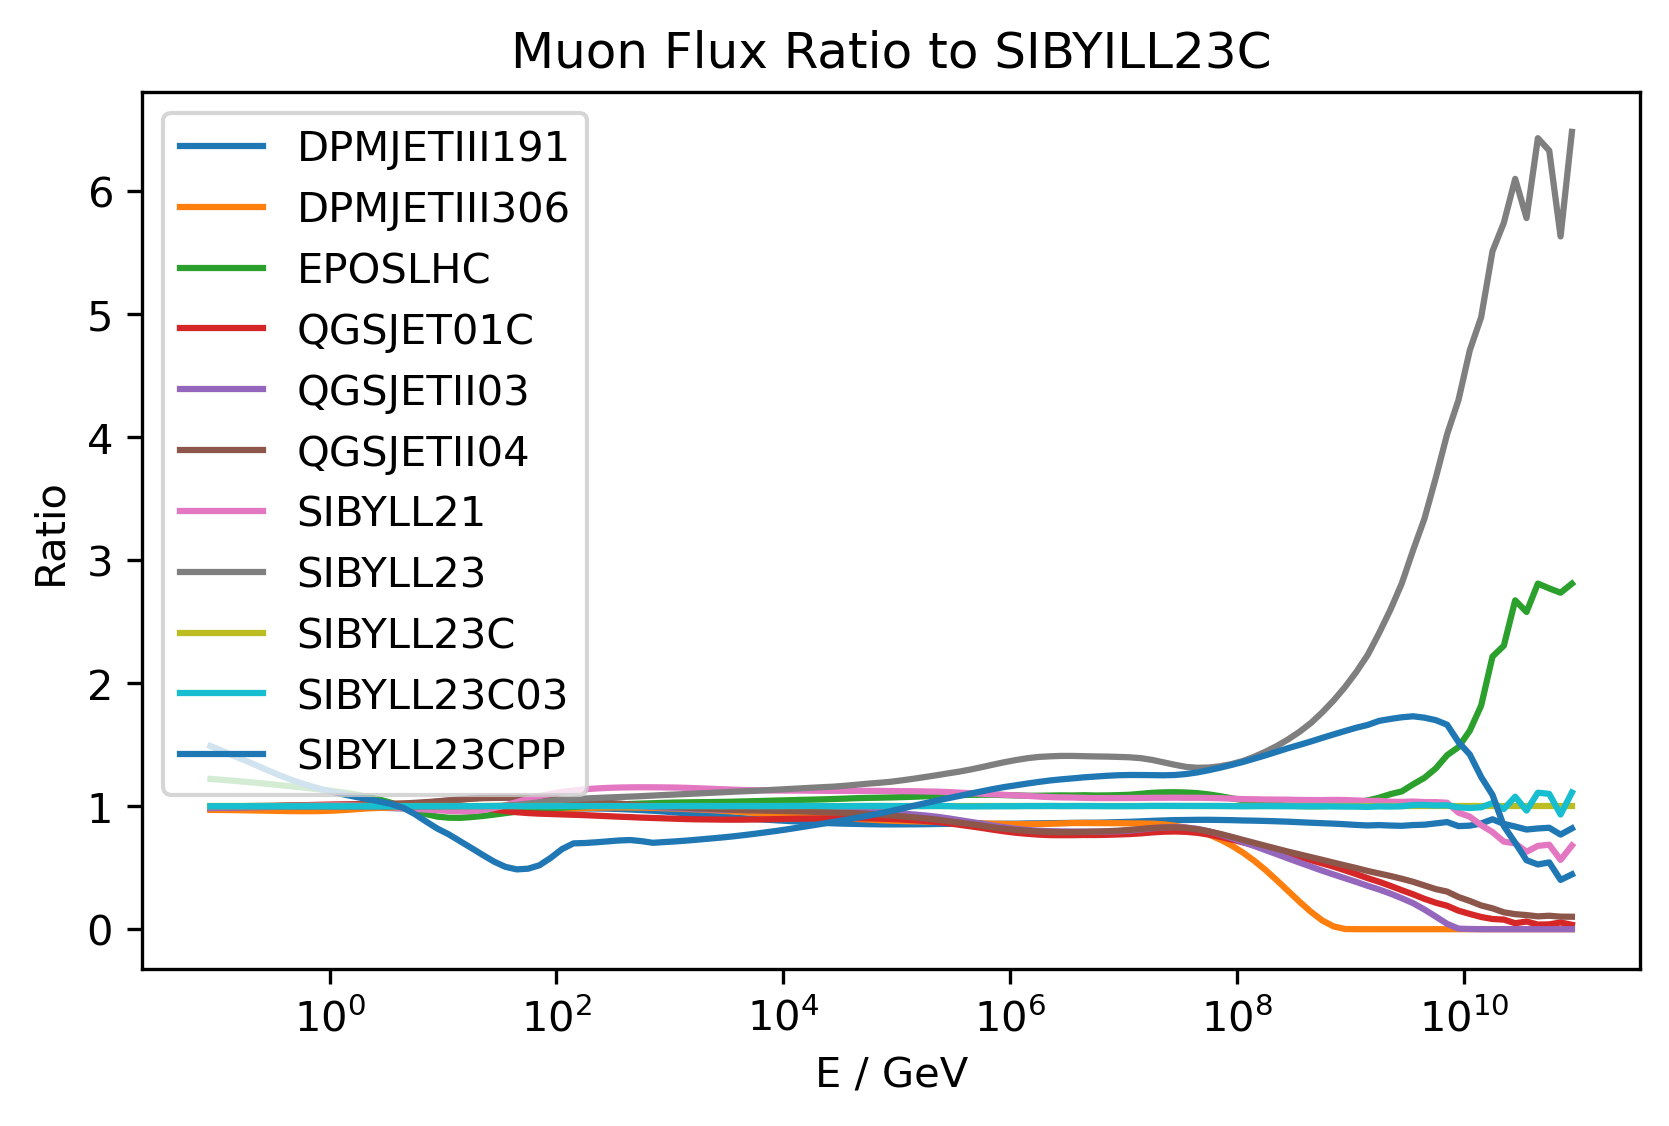

In [6]:
fig = plt.figure(figsize=(5.45, 3.64),
    dpi=300,
    constrained_layout=True)
for m in models:
    plt.plot(run.e_grid, muon_fluxes[m]/muon_fluxes["SIBYLL23C"], label=m)
plt.xscale('log')
plt.yscale('linear')
plt.ylabel('Ratio')
plt.xlabel('E / GeV')
plt.title("Muon Flux Ratio to SIBYILL23C")
plt.legend()